___
# Representação de Gêneros em Jogos de Video-Game

## <font color='red'>Filipe Foschini Borba</font>
___

## <font color='blue'>Score (Pontuação em Review feito pela IGN)</font>

___
### Itens 1 a 3 - Resolução:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from scipy.stats import invweibull

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\fibor\Desktop\Insper\2º Semestre\Ciência dos Dados\Github\CD\MiniProjeto1


In [2]:
dados = pd.read_table("gamedata.csv", encoding="windows-1252", sep=";")

In [3]:
dados.head()

,Game,Platform,Score,Genre
0,Wolfenstein: The New Order,Xbox One,7.8,Shooter
1,Mario Kart 8,Wii U,9.0,"Racing, Action"
2,Sportsfriends,PlayStation 3,8.7,"Action, Compilation"
3,Sportsfriends,PlayStation 4,8.7,"Action, Compilation"
4,Sportsfriends,PC,8.7,"Action, Compilation"


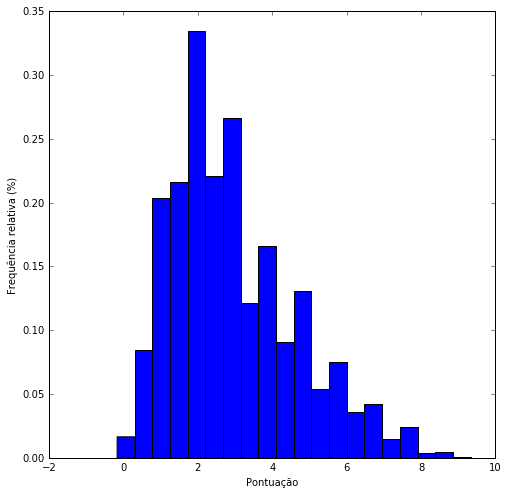

In [4]:
dados.Score.astype(float)
score = dados.Score
score = score.sort_values()
lista = []
for i in score:
    i = score.mean() - (i - score.mean() + 4)
    lista.append(i)
lista = pd.Series(data=lista)
lista = lista.sort_values()
scoreplot = lista.plot.hist(bins = 20, normed = 1, color="blue", figsize=(8,8))
plt.ylabel("Frequência relativa (%)")
plt.xlabel("Pontuação")
scoreplot

___
### Itens 4 a 6 - Resolução:

## 4)

<font color = "blue">Por possuir assimetria à direita, é interessante utilizar as seguintes distribuições:
<br><br>
- Distribuição InvGauss, olhando o exemplo do scipy.stats e o histograma parecia ser interessante, pois tinha um formato com assimetria à direita e parecido com o do histograma.
<br>
- Distribuição Gamma, pela facilidade de se moldá-la e ter servido de exemplo em sala de aula.
</font>


## 5)
<font color = "blue">Analisando o histograma acima, é possível deduzir que a média está por volta do valor 3, pela frequência relativa mais alta das pontuações e a assimetria à esquerda. Além disso, o desvio padrão do histograma está próximo de 2.5, por ter uma concentração maior de valores próximos à média.</font>

In [5]:
#Média e Desvio Padrão da Pontuação
print("Média:",np.mean(lista))
print("Desvio Padrão:",np.std(lista))
print("Variância:",np.var(lista))
print("Mediana:",np.median(lista))

Média: 2.9145374700576965
Desvio Padrão: 1.7217392414872703
Variância: 2.9643860156771606
Mediana: 2.62907494012


Fit GAMMA: (235.88929617812983, -20.458372188216664, 0.11609664350082582)
Fit INVGAUSS (0.023510726887429639, -5.8591192179342109, 541.49772826232925)


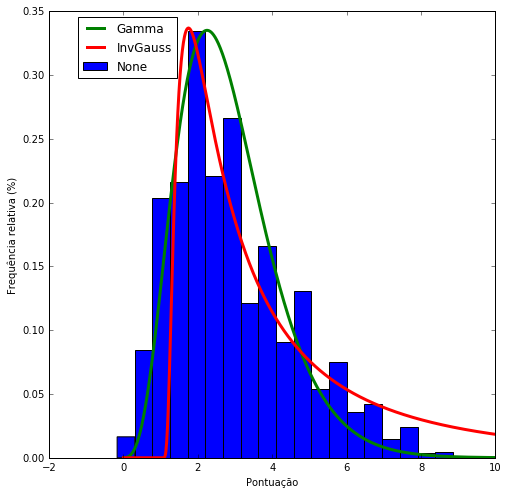

In [6]:
scoreplot = lista.plot.hist(bins = 20, normed = 1, color="blue", figsize=(8,8))

#########################################
#Curva Normal
#Gamma
k_gamma = 5
theta_gamma = lista.mean()/k_gamma
x = np.linspace(0, 10, 1000)
gamma = stats.gamma.pdf(x, scale=theta_gamma, loc=lista.mean()-3, a=k_gamma)
plt.plot(x, gamma, '-', color='green', lw=3, label="Gamma") # Plota a gamma teórica
print("Fit GAMMA:", stats.gamma.fit(score))

#InvGauss
print("Fit INVGAUSS", stats.invgauss.fit(score))
invgauss = stats.invgauss.pdf(x, scale=lista.std()+0.6, loc=1, mu=lista.std())
plt.plot(x, invgauss, '-', color='red', lw=3, label="InvGauss")
#########################################
plt.ylabel("Frequência relativa (%)")
plt.xlabel("Pontuação")
plt.legend(bbox_to_anchor=(0.3,1))
scoreplot

<font color="blue">Observando o histograma com os plots das distribuições normais, é previsível que a distribuição Gamma seja melhor que a InvGauss, pois consegue abranger melhor os pontos do histograma.</font>

___
### Itens 7 a 9 - Resolução:

[0, 10, 0, 10]

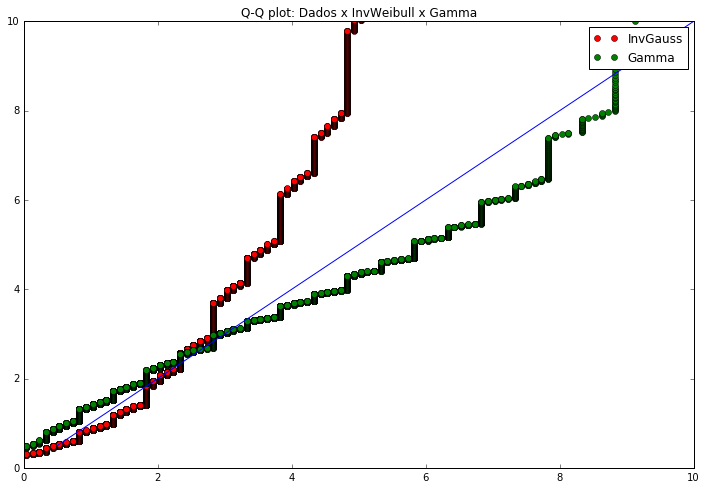

In [11]:
#QQplot

# Calcula a frequência relativa acumulada com os dados vindos dos arquivos
fra = [] # frequencia relativa acumulada
for i in range(len(lista)):
    acc = (i - 0.5) / len(lista)
    if acc < 0:
        acc = 0
    fra.append(acc) # ver Magalhães e Lima (pag. 195)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_invgauss = stats.invgauss.ppf(fra, scale=lista.mean(), mu=lista.std())
q_gamma = stats.gamma.ppf(fra, scale=theta_gamma, loc=lista.mean()-3, a=k_gamma)


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x InvGauss x Gamma")

invgauss_plot, = plt.plot(lista, q_invgauss, 'o', color="red", label="InvGauss")
gamma_plot, = plt.plot(lista, q_gamma, 'o', color="green", label = "Gamma")

plt.legend(handles=[invgauss_plot, gamma_plot])
plt.plot((min(score), max(score)), (min(score), max(score)), '-')
plt.axis([0,10,0,10])


#for i in range(len(score)):
#    plt.plot((score[i], score[i]), (q_invweibull[i], score[i]), '-', color='red', alpha=0.3  )
#    plt.plot((score[i], score[i]), (q_gamma[i], score[i]), '-', color='green', alpha=0.3  )

<font color="blue">Analisando o gráfico, é possível perceber que as duas distribuições começam similares, porém a InvGauss acaba de tornando muito dispersa da teórica.</font>

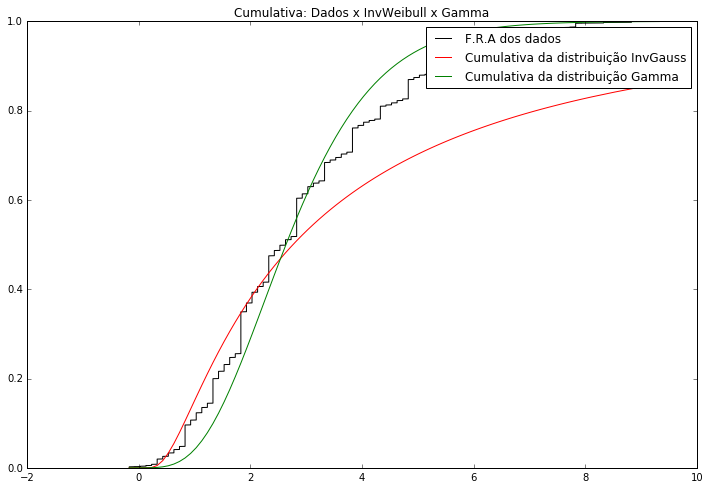

In [13]:
#Cumulativa
cdf_invgauss = stats.invgauss.cdf(lista, scale=lista.mean(), mu=lista.std())
cdf_gamma = stats.gamma.cdf(lista, scale=theta_gamma, loc=lista.mean()-3, a=k_gamma)


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x InvWeibull x Gamma")

dados_fra_plot, = plt.plot(lista, fra, '-', color='black', label="F.R.A dos dados")
cdf_invgauss_plot,   = plt.plot(lista, cdf_invgauss, '-', color='red', label = "Cumulativa da distribuição InvGauss")
cdf_gamma_plot, = plt.plot(lista, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")

plt.legend(handles=[dados_fra_plot, cdf_invgauss_plot, cdf_gamma_plot])


#for i in range(len(tempos)):
#    plt.plot((tempos[i], tempos[i]), (fra[i], cdf_exponencial[i]), ':', color="red", alpha=0.3)
    #Omitido para não poluir muito o gráfico
#    plt.plot((tempos[i], tempos[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)

<font color="blue">Observando os gráfico, é possível perceber que a distribuição Gamma é melhor em relação à InvGauss, pois ela está mais próxima da curva teórica, demonstrando que é mais apropriada para o ajuste, apesar de ainda não ser tão precisa.</font>

___
### Itens 10 e 11 - Resolução:

In [17]:
# Erro quadrático nas CDFs
erro_quad_cdf_invgauss = sum((fra - cdf_invgauss)**2)

erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)

print("Erro quadrático da CDF da InvGauss versus F.R.A", erro_quad_cdf_invgauss)
print("Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_gamma)

Erro quadrático da CDF da InvGauss versus F.R.A 162.461614488
Erro quadrático da CDF da Gamma versus F.R.A 59.2526435089


In [19]:
# Diferenças absolutas
soma_difs_cdf_invgauss = sum( abs(fra - cdf_invgauss))
soma_difs_cdf_gamma = sum( abs(fra - cdf_gamma))

print("Erro da soma do módulo das diferenças da InvGauss versus F.R.A: {0} \nErro da soma do módulo das diferenças da gamma versus F.R.A: {1}".format(soma_difs_cdf_invgauss, soma_difs_cdf_gamma))

Erro da soma do módulo das diferenças da InvGauss versus F.R.A: 1356.2829212735812 
Erro da soma do módulo das diferenças da gamma versus F.R.A: 905.9593966151152


<font color="blue">Observando os dados acima, vemos que o Erro Quadrático da CDF é menor no caso da distribuição Gamma, assim como no Erro da soma do módulo das diferenças entre F.R.A e CDF com os parâmetros testados. Deste modo, a distribuição Gamma oferece o melhor ajuste.</font>

In [38]:
dataframe = pd.DataFrame({"Pontuação no Review" : lista,
                        "Dist. InvGauss" : q_invgauss,
                        "Erro Quád. InvGauss" : erro_quad_cdf_invgauss,
                        "Erro da Diferença InvGauss" : soma_difs_cdf_invgauss,
                        "Dist. Gamma" : q_gamma,
                        "Erro Quád. Gamma" : erro_quad_cdf_gamma,
                        "Erro da Diferença Gamma" : soma_difs_cdf_gamma})
dataframe[::-1] #Mostrando da maior pontuação para a menor

,Dist. Gamma,Dist. InvGauss,Erro Quád. Gamma,Erro Quád. InvGauss,Erro da Diferença Gamma,Erro da Diferença InvGauss,Pontuação no Review
0,10.394962,92.982898,59.252644,162.461614,905.959397,1356.282921,9.329075
1,10.016891,85.931539,59.252644,162.461614,905.959397,1356.282921,9.129075
2,9.765891,81.343989,59.252644,162.461614,905.959397,1356.282921,9.029075
26,9.577321,77.949365,59.252644,162.461614,905.959397,1356.282921,8.829075
20,9.426041,75.259483,59.252644,162.461614,905.959397,1356.282921,8.829075
21,9.299603,73.034846,59.252644,162.461614,905.959397,1356.282921,8.829075
22,9.190919,71.140162,59.252644,162.461614,905.959397,1356.282921,8.829075
23,9.095565,69.491546,59.252644,162.461614,905.959397,1356.282921,8.829075
24,9.010594,68.033411,59.252644,162.461614,905.959397,1356.282921,8.829075
25,8.933940,66.727040,59.252644,162.461614,905.959397,1356.282921,8.829075
